In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.colors as colors

import DataPreprocessing

In [3]:
##Minkowski product of 4-vectors, vector inputs
def m_prod(p1, p2):
    return np.multiply(p1[0], p2[0]) - np.sum(np.multiply(p1[1:], p2[1:]))

def analytic_me_calc(q1, q2, p1, p2, p3):
    constants = 1
    return constants*(m_prod(p1, q1)**2 + m_prod(p1, q2)**2 + m_prod(p2, q1)**2 + m_prod(p2, q2)**2)/(m_prod(p1, p3)*m_prod(p2, p3))

In [57]:
me = np.load('LO/MG_uuxg/3Jet_500000.npy', allow_pickle=True) #Matrix elements
mom = np.load('LO/LO_3_0.01_NJet/PS3_0.01_500000.npy', allow_pickle=True, encoding='bytes') #4-momenta of inputs

analytic_me = np.array([analytic_me_calc(*mom[i]) for i in range(len(mom))])

lin_perc = np.mean(100*np.divide(np.abs(analytic_me - np.mean(analytic_me)*me/np.mean(me)), analytic_me))
print(lin_perc)

5.636680607956805e-13


In [67]:
me = np.load('LO/MG_uuxg_2/me_3jet_1000000.npy', allow_pickle=True) #Matrix elements
mom = np.load('LO/MG_uuxg_2/mom_3jet_1000000.npy', allow_pickle=True, encoding='bytes')

p1=np.array([500,0,0,500])
p2=np.array([500,0,0,-500])

analytic_me = np.array([analytic_me_calc(p1,p2,*mom[i]) for i in range(len(mom))])

lin_perc = np.mean(100*np.divide(np.abs(analytic_me - np.mean(analytic_me)*me/np.mean(me)), analytic_me))

print(lin_perc)

1.4188644205377335e-10


In [68]:
s12, s13, s23 = DataPreprocessing.mandel_creation(['1,2','1,3','2,3'],np.array([np.ndarray.flatten(np.array(element)) for element in mom]))
#s12, s13, s23 = DataPreprocessing.mandel_creation(['3,4','3,5','4,5'],np.array([np.ndarray.flatten(np.array(element)) for element in mom]))
S = s12 + s13 + s23
print(S)

[1000000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]


In [69]:
x1 = np.divide(s12, S)
x2 = np.divide(s13, S)
x3 = np.divide(s23, S)
print(x1)

x2i = np.linspace(0, 1, 500) #x1 coordinates
x3i = np.linspace(0, 1, 500) #x2 coordinates
X2i, X3i = np.meshgrid(x2i, x3i) #2d regularly spaced grid of coordinates.

[0.30927477 0.2803805  0.27362695 ... 0.04306294 0.33737525 0.34529759]


In [70]:
#Value at grid coordinate is mapped to the nearest actual datapoint.
grid = griddata((x2, x3), 100*np.divide(np.abs(analytic_me - np.mean(analytic_me)*me/np.mean(me)), analytic_me), (X2i, X3i), method='linear') 

Text(0.5,0,'x3')

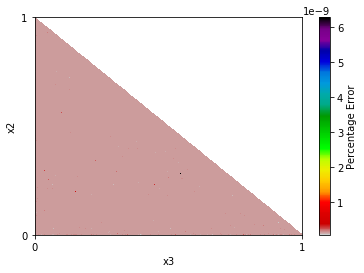

In [71]:
fig, ax = plt.subplots()
im = ax.pcolor(grid, cmap = 'nipy_spectral_r') #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Percentage Error')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('x2')
ax.set_xlabel('x3')

In [72]:
print((100*np.divide(np.abs(analytic_me - np.mean(analytic_me)*me/np.mean(me)), analytic_me))[1000:1005])

[1.41418437e-10 1.41282283e-10 1.41257354e-10 1.40695450e-10
 1.41210997e-10]


In [73]:
print(mom[109755])


[[ 305.06071302 -191.11365238  224.0253026   -79.68860829]
 [ 499.99967382  313.58351181 -366.7620729   130.9604399 ]
 [ 194.93961316 -122.46985943  142.7367703   -51.27183161]]


In [74]:
print(me[109756]/np.mean(me))
print(analytic_me[109756]/np.mean(analytic_me))
print((analytic_me[109655]/np.mean(analytic_me)-me[109655]/np.mean(me))/(analytic_me[109655]/np.mean(analytic_me)))

0.2034262781617181
0.20342627816143188
-1.4133621009068264e-12
